In [2]:
import pandas as pd
encoding = 'latin1'  # appropriate encoding

df = pd.read_csv('/content/Clean_dataset.csv', encoding=encoding, error_bad_lines=False)


<ipython-input-2-109ee4dc140b>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/Clean_dataset.csv', encoding=encoding, error_bad_lines=False)


In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Columns for One-Hot Encoding (Nominal)
nominal_columns = ['MaritalStatus', 'Education', 'Employment1', 'Income2', 'NumHHold2', 'CPDemo1', 'Internet',
                   'RentHome1', 'Sex', 'QLactlm2', 'UseEquip', 'Blind', 'Decide', 'DiffWalk', 'DiffDress', 'DiffAlon',
                   'Smoke100', 'UseNow3', 'GenHealth', 'CVDInfarction4', 'CVDCoronaryHeartDisease4', 'CVDStroke3',
                   'Asthma3', 'ChronicCancer', 'ColorectalCancer', 'ChronicCOPD1', 'HaveArthritis3', 'AdDepressionEver2',
                   'CheckKidney', 'Diabetes3', 'ExerAny2', 'ExrAct11', 'ExerOft1', 'ExerHmm1', 'ExrAct21', 'Strength',
                   'SeatBelt', 'FluShot6', 'Tetanus', 'PneuVac3', 'HIVTest6', 'Medicare', 'DelayMed', 'NoCov121',
                   'MedCost', 'CarerCVD', 'MedBills', 'AgeG', 'BMI5', 'ChldCnt', 'EducAg', 'IncomG', 'Smoker3',
                   'RFSmok3', 'DrnkAny5', 'RFBing5', 'FtJuda1', 'FrutDa1', 'BeanDay', 'GreenDay', 'OrngDay', 'Vegeda1',
                   'MisFrtn', 'MisVegn', 'FrtResp', 'VegResp', 'FrtLt1', 'VegLt1', 'Frt16', 'Veg23', 'FruitEx',
                   'VegetEx', 'TotInda', 'Actin11', 'Actin21', 'PaCat1', 'PainDx1', 'Pa150R2', 'Pa300R2', 'Pa30021',
                   'PaStrng', 'PaRec1', 'PaStae1', 'LmtAct1', 'LmtWrk1', 'LmtScl1', 'RFSeat2', 'RFSeat3', 'AidTst3']

# Columns for Label Encoding (Ordinal)
ordinal_columns = ['FrtLt1', 'VegLt1', 'Frt16', 'Veg23', 'FruitEx', 'VegetEx', 'TotInda', 'Actin11', 'Actin21', 'PaCat1',
                   'PainDx1', 'Pa150R2', 'Pa300R2', 'Pa30021', 'PaStrng', 'PaRec1', 'PaStae1', 'LmtAct1', 'LmtWrk1',
                   'LmtScl1', 'RFSeat2', 'RFSeat3', 'AidTst3']

# Columns for Frequency Encoding
object_columns = df.select_dtypes(include='object').columns
frequency_encode_columns = list(set(object_columns) - set(nominal_columns) - set(ordinal_columns))

# One-Hot Encoding
df_encoded_nominal = pd.get_dummies(df[nominal_columns])

# Label Encoding
label_encoder = LabelEncoder()
df_encoded_ordinal = df[ordinal_columns].apply(label_encoder.fit_transform)

# Frequency Encoding
df_encoded_frequency = pd.DataFrame()
for column in frequency_encode_columns:
    freq_encoding = df[column].value_counts(normalize=True).to_dict()
    df_encoded_frequency[column] = df[column].map(freq_encoding)

# Combine all encoded DataFrames
df_encoded = pd.concat([df_encoded_nominal, df_encoded_ordinal, df_encoded_frequency], axis=1)



In [4]:
df_encoded

,ExerOft1,ExerHmm1,Strength,BMI5,FtJuda1,FrutDa1,BeanDay,GreenDay,OrngDay,Vegeda1,...,Pa30021,PaStrng,PaRec1,PaStae1,LmtAct1,LmtWrk1,LmtScl1,RFSeat2,RFSeat3,AidTst3
0,105.000000,20.000000,0.0,1822.0,17.0,3.0,33.0,43.0,29.0,43.000000,...,0,0,0,0,0,0,0,0,0,1
1,135.771555,92.947681,0.0,2746.0,3.0,43.0,29.0,29.0,33.0,100.000000,...,0,0,0,0,1,1,1,0,0,1
2,205.000000,30.000000,0.0,2197.0,29.0,20.0,29.0,33.0,17.0,57.000000,...,0,0,0,0,0,0,0,0,0,0
3,135.771555,92.947681,0.0,3594.0,0.0,7.0,100.0,33.0,10.0,100.000000,...,0,0,0,0,0,0,0,0,0,0
4,102.000000,15.000000,0.0,3986.0,71.0,86.0,0.0,43.0,0.0,100.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297757,135.771555,92.947681,0.0,2263.0,10.0,29.0,43.0,29.0,57.0,80.559496,...,0,0,0,0,2,2,3,0,0,0
297758,202.000000,100.000000,0.0,3472.0,67.0,27.0,71.0,50.0,71.0,100.000000,...,0,0,0,0,0,0,0,0,0,1
297759,135.771555,92.947681,0.0,2695.0,100.0,7.0,100.0,100.0,29.0,100.000000,...,0,0,0,0,2,2,2,0,0,0
297760,135.771555,92.947681,0.0,3224.0,0.0,7.0,100.0,0.0,0.0,80.559496,...,0,0,0,0,1,1,3,0,0,0


In [5]:
# Identify float columns
float_columns = df_encoded.select_dtypes(include='float').columns

# Round off float columns to 2 decimal places
df_encoded[float_columns] = df_encoded[float_columns].round(2)


In [6]:
# Drop the original columns from df
df.drop(columns=nominal_columns + ordinal_columns + frequency_encode_columns, inplace=True)

# Concatenate df and df_encoded
df = pd.concat([df, df_encoded], axis=1)

In [7]:
# Drop rows with NaN values
df = df.dropna()
df

,Children,Weight2,Height3,CPDemo4,PhysicalHealth,MentalHealth,PoorHealth,AlcDay5,FruitJu1,Fruit1,...,Pa30021,PaStrng,PaRec1,PaStae1,LmtAct1,LmtWrk1,LmtScl1,RFSeat2,RFSeat3,AidTst3
0,2.0,127,510.0,70.000000,0.0,0.0,5.300882,0.0,305.0,301.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,160,504.0,70.000000,3.0,2.0,0.000000,220.0,301.0,203.0,...,0,0,0,0,1,1,1,0,0,1
2,0.0,128,504.0,75.000000,2.0,0.0,0.000000,208.0,202.0,306.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,225,503.0,70.000000,0.0,0.0,5.300882,0.0,205.0,206.0,...,0,0,0,0,0,0,0,0,0,1
5,1.0,106,500.0,40.000000,1.0,15.0,0.000000,201.0,320.0,325.0,...,0,0,1,0,2,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297756,0.0,160,505.0,40.477125,0.0,2.0,0.000000,0.0,101.0,204.0,...,0,0,0,0,0,0,0,0,0,0
297757,0.0,136,505.0,40.477125,0.0,0.0,5.300882,0.0,303.0,202.0,...,0,0,0,0,2,2,3,0,0,0
297759,0.0,138,500.0,40.477125,14.0,15.0,0.000000,0.0,101.0,302.0,...,0,0,0,0,2,2,2,0,0,0
297760,0.0,182,503.0,40.477125,0.0,0.0,5.300882,0.0,0.0,302.0,...,0,0,0,0,1,1,3,0,0,0


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Extract float64 and non-binary int64 columns
float_columns = df.select_dtypes(include='float64').columns
non_binary_columns = df.select_dtypes(include=['int64', 'uint8']).columns

# Extract columns to normalize
columns_to_normalize = float_columns.tolist() + non_binary_columns.tolist()

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df[columns_to_normalize])

# Scale the values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Create a new DataFrame with the scaled and imputed values
df_scaled_imputed = pd.DataFrame(data=X_scaled, columns=columns_to_normalize)

# Replace the original columns in df with the normalized and imputed values
df[float_columns] = df_scaled_imputed[float_columns]
df[non_binary_columns] = df_scaled_imputed[non_binary_columns]

In [9]:
# Drop rows with NaN values
df = df.dropna()
df

,Children,Weight2,Height3,CPDemo4,PhysicalHealth,MentalHealth,PoorHealth,AlcDay5,FruitJu1,Fruit1,...,Pa30021,PaStrng,PaRec1,PaStae1,LmtAct1,LmtWrk1,LmtScl1,RFSeat2,RFSeat3,AidTst3
0,1.831881,-1.218183,-0.210411,1.147983,-0.437989,-0.420952,0.405672,-0.976660,1.430784,1.292727,...,-0.408939,-0.470189,-0.683784,-0.344008,-0.585423,-0.591232,-0.575229,-0.231928,-0.371284,1.764926
1,-0.536632,-0.380501,-0.376325,1.147983,-0.004770,0.065701,-1.126673,1.376498,1.397467,0.221195,...,-0.408939,-0.470189,-0.683784,-0.344008,0.759116,0.651485,0.291170,-0.231928,-0.371284,1.764926
2,-0.536632,-1.192799,-0.376325,1.344096,-0.149176,-0.420952,-1.126673,1.248144,0.572885,1.347397,...,-0.408939,-0.470189,-0.683784,-0.344008,-0.585423,-0.591232,-0.575229,-0.231928,-0.371284,-0.566596
4,0.647625,-1.751254,-0.486933,-0.028692,-0.293583,3.228945,-1.126673,1.173270,1.555720,1.555143,...,-0.408939,-0.470189,0.451953,-0.344008,2.103654,0.651485,2.023967,-0.231928,-0.371284,-0.566596
5,0.647625,1.523322,2.333592,0.755758,-0.437989,-0.420952,0.405672,0.103653,-1.109596,-0.894073,...,-0.408939,2.126803,1.587689,2.906910,2.103654,1.894202,2.023967,-0.231928,2.693357,-0.566596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294148,-0.536632,0.127185,-0.403977,-0.009978,-0.437989,-0.420952,0.405672,1.173270,1.430784,1.336463,...,-0.408939,-0.470189,-0.683784,-0.344008,-0.585423,-0.591232,-0.575229,-0.231928,-0.371284,1.764926
294149,-0.536632,-0.380501,-0.348672,-0.009978,-0.437989,0.065701,-1.126673,-0.976660,-0.268355,0.232129,...,-0.408939,-0.470189,-0.683784,-0.344008,-0.585423,-0.591232,-0.575229,-0.231928,-0.371284,-0.566596
294150,-0.536632,-0.989724,-0.348672,-0.009978,-0.437989,-0.420952,0.405672,-0.976660,1.414125,0.210261,...,-0.408939,-0.470189,-0.683784,-0.344008,2.103654,1.894202,2.023967,-0.231928,-0.371284,-0.566596
294151,-0.536632,-0.938956,-0.486933,-0.009978,1.583698,3.228945,-1.126673,-0.976660,-0.268355,1.303661,...,-0.408939,-0.470189,-0.683784,-0.344008,2.103654,1.894202,1.157568,-0.231928,-0.371284,-0.566596


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


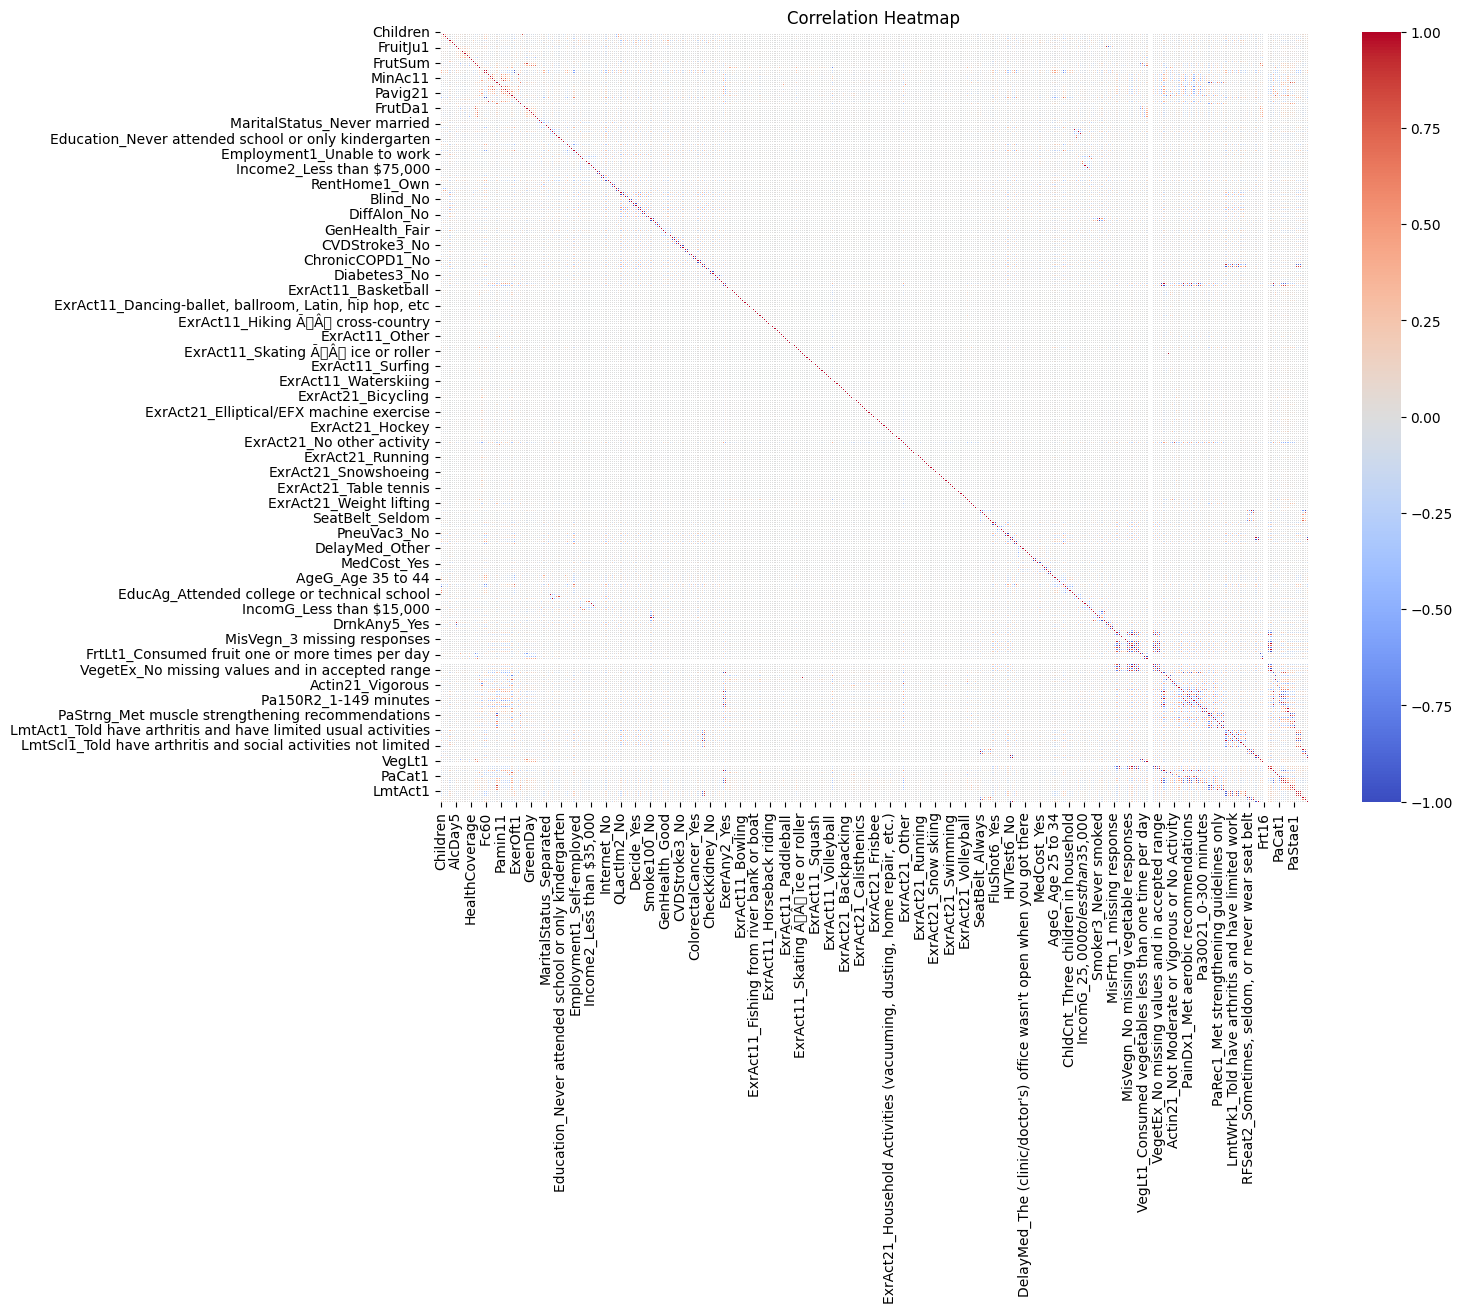

Original DataFrame shape: (290664, 406)
DataFrame shape after removing highly correlated variables: (290664, 310)


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated variables
threshold = 0.9  # You can adjust this threshold based on your requirements
highly_correlated = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Remove highly correlated variables
df_filtered = df.drop(columns=highly_correlated)

# Display the shape of the new DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing highly correlated variables: {df_filtered.shape}")


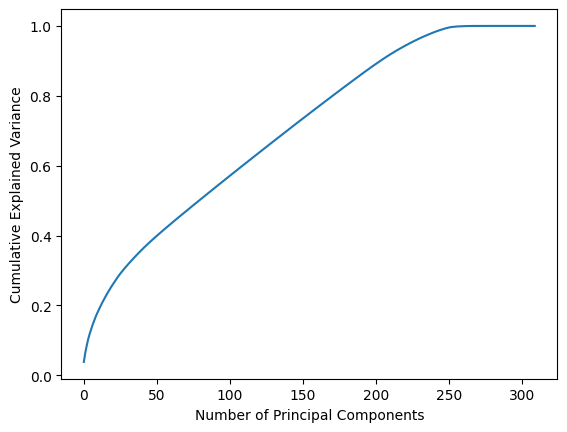

Number of components to explain 95.0% variance: 225


In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# Assuming df_filtered is your DataFrame with 290664 rows × 310 columns
X_filtered = df_filtered.values

# Apply PCA
pca = PCA()
X_pca_filtered = pca.fit_transform(X_filtered)

# Plot explained variance ratio
explained_variance_ratio_filtered = pca.explained_variance_ratio_
cumulative_explained_variance_filtered = explained_variance_ratio_filtered.cumsum()

plt.plot(cumulative_explained_variance_filtered)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Determine the number of components that explain a certain percentage of variance
target_explained_variance_filtered = 0.95  # You can adjust this threshold
num_components_filtered = np.argmax(cumulative_explained_variance_filtered >= target_explained_variance_filtered) + 1
print(f'Number of components to explain {target_explained_variance_filtered * 100}% variance: {num_components_filtered}')

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components_filtered)
X_pca_filtered = pca.fit_transform(X_filtered)

# Create a new DataFrame with the reduced dimensions
df_reduced_filtered = pd.DataFrame(data=X_pca_filtered, columns=[f'PC{i+1}' for i in range(num_components_filtered)])


In [ ]:
# Clustering High risk and Low risk pepole

from sklearn.cluster import KMeans

X_cluster = df_reduced_filtered.values

# Define the number of clusters
n_clusters = 2  # You can adjust the number of clusters based on your requirements

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_filtered['Cluster_Labels'] = kmeans.fit_predict(X_cluster)

# Check the distribution of clusters
print(df_filtered['Cluster_Labels'].value_counts())

# You may want to inspect the characteristics of each cluster
cluster_summary = df_filtered.groupby('Cluster_Labels').mean()
print(cluster_summary)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    165657
1    125007
Name: Cluster_Labels, dtype: int64
                Children   Weight2   Height3   CPDemo4  PhysicalHealth  \
Cluster_Labels                                                           
0              -0.087000  0.050236 -0.046729 -0.081812        0.147845   
1               0.115127 -0.067074  0.061044  0.108023       -0.195070   

                MentalHealth  PoorHealth   AlcDay5  FruitJu1    Fruit1  ...  \
Cluster_Labels                                                          ...   
0                   0.046383    0.053993 -0.170034 -0.069991  0.043850  ...   
1                  -0.060794   -0.071103  0.224960  0.093299 -0.056868  ...   

                LmtScl1_Told have arthritis and social activities limited a little  \
Cluster_Labels                                                                       
0                                                        0.071643                    
1                                                       -0.094483    

In [ ]:

cluster_summary = df_filtered.groupby('Cluster_Labels').mean()

# Identify the cluster with higher average values (assuming higher values indicate high risk)
high_risk_cluster = cluster_summary.idxmax().iloc[0]

# Map cluster labels to risk levels
risk_mapping = {high_risk_cluster: 'High Risk'}
risk_mapping.update({cluster: 'Low Risk' for cluster in cluster_summary.index if cluster != high_risk_cluster})

# Create a new column 'Risk_Level' based on the cluster labels
df_filtered['Risk_Level'] = df_filtered['Cluster_Labels'].map(risk_mapping)

# Check the distribution of risk levels
print(df_filtered['Risk_Level'].value_counts())


Low Risk     165657
High Risk    125007
Name: Risk_Level, dtype: int64


# **Data Insights - Identifying 3 actionable insights leveraging our understanding of our data, explaining how these insights can be used by an organization and what impact will they lead to.**

# **INSIGHT 1: Correlation of Lifestyle Factors and Health Indicators**

The insight involves creating a correlation matrix and visualizing it through a heatmap. The selected columns represent various lifestyle factors (e.g., alcohol consumption, fruit and vegetable intake, exercise habits) and health indicators (e.g., physical health, mental health, poor health). The heatmap illustrates the correlation between these factors, providing a quick overview of how lifestyle choices may relate to different aspects of health.

**Why We Chose This Insight:**
- Understanding the relationships between lifestyle factors and health indicators is crucial for health insurance companies to assess risk and make informed decisions.
- Identifying strong correlations can help in designing targeted interventions or wellness programs to improve specific aspects of health.

**What It Represents:**
- The heatmap represents a visual summary of the interconnections between various lifestyle choices and health outcomes within the dataset.
- It provides insights into potential patterns and relationships that can inform policy decisions, wellness initiatives, or personalized health interventions for policyholders.

**HOW WILL IT BENEFIT HEALTH INSURANCE COMPANY:**

1. **Risk Assessment:** Understand lifestyle-health correlations for accurate risk assessment and premium adjustments.
2. **Targeted Wellness:** Design programs to address specific health concerns in certain policyholder groups.
3. **Personalized Interventions:** Offer tailored advice and resources based on individual lifestyle patterns.
4. **Claims Management:** Forecast and manage health-related claims more effectively.
5. **Customer Engagement:** Improve satisfaction by actively contributing to policyholders' health.
6. **Preventive Care:** Promote preventive care to reduce chronic conditions and claim frequency, ensuring business sustainability.

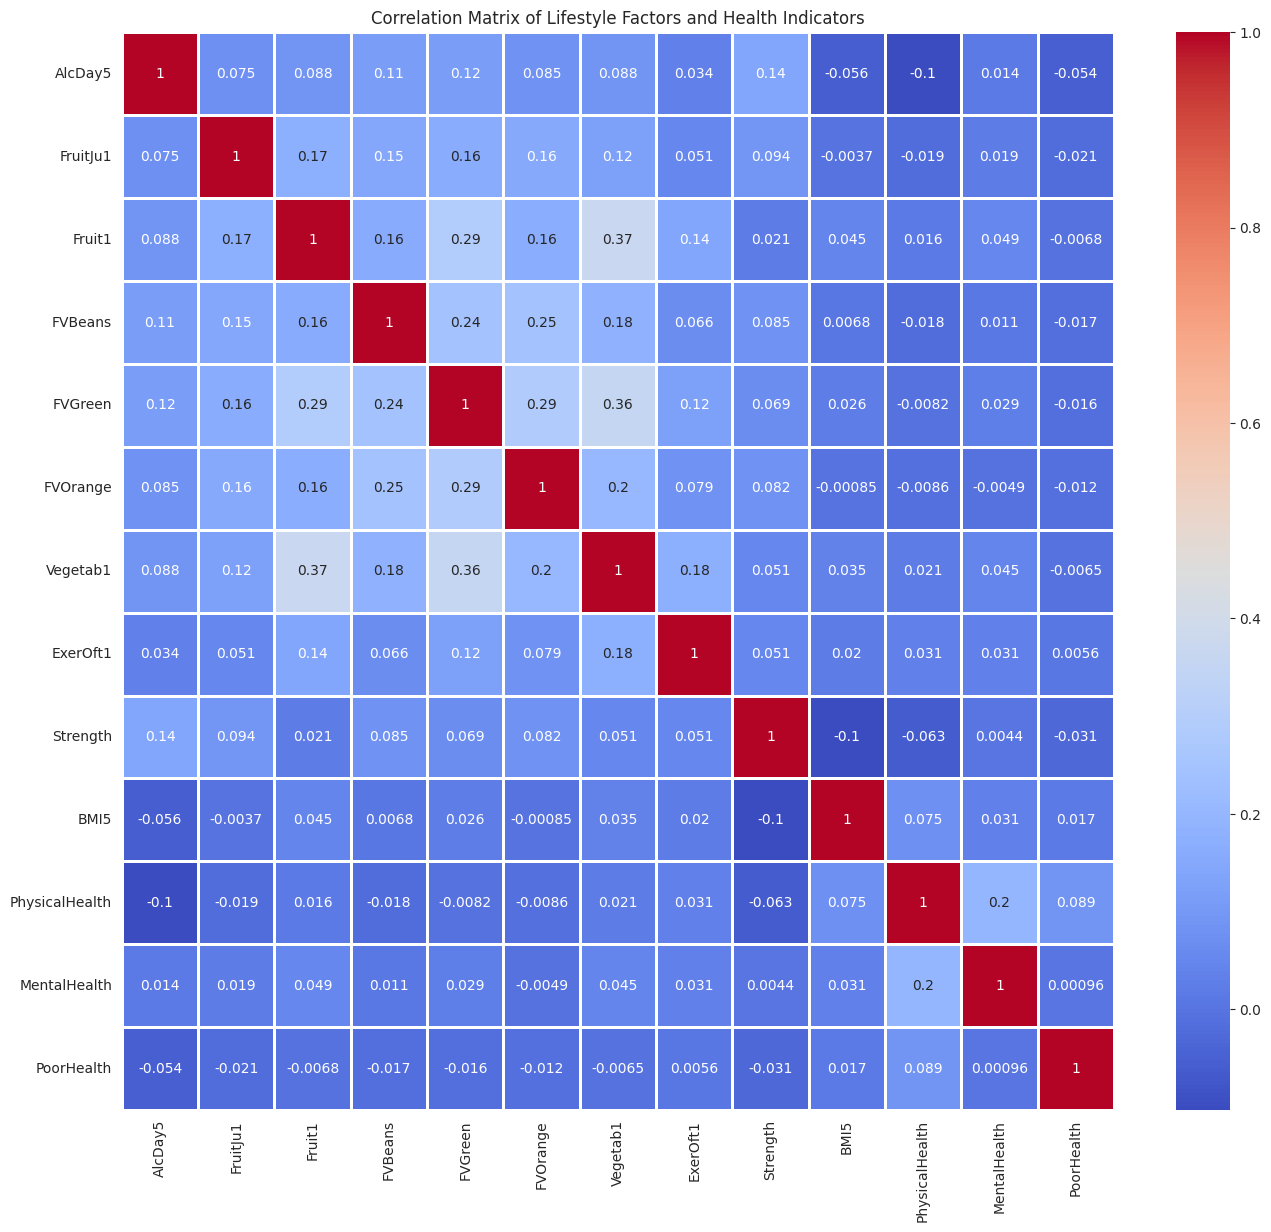

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns
columns_of_interest = [
    'AlcDay5',
    'FruitJu1',
    'Fruit1',
    'FVBeans',
    'FVGreen',
    'FVOrange',
    'Vegetab1',
    'ExerOft1',
    'Strength',
    'BMI5',
    'PhysicalHealth',
    'MentalHealth',
    'PoorHealth'

]
# Create a sub-dataframe with selected columns
sub_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = sub_df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix of Lifestyle Factors and Health Indicators')
plt.show()

# **INSIGHT 2: Analysing Smoking Habits by Gender**

**Illustration:**

In the below insight, a countplot visualizes the distribution of smoking habits by gender. The plot is divided into two bars representing males and females, each further segmented into categories indicating smoking status ("Current smoker - now smokes every day" or not). The counts on the y-axis represent the number of individuals falling into each category.

**Interpretation:**

1. **Current Smoking Status:**
   - The bars reveal the number of individuals classified as current smokers who smoke every day, providing a clear distinction between male and female policyholders.

2. **Gender Disparities:**
   - By comparing the heights of the bars, we can observe any gender disparities in smoking habits. The visualization allows us to identify whether smoking is more prevalent among males, females, or if there's a relatively equal distribution.

3. **Risk Assessment:**
   - The insight aids in assessing the risk associated with smoking habits in the insured population. If one gender has a significantly higher proportion of smokers, it implies a potential concentration of higher health risks in that group.

4. **Policy Pricing Considerations:**
   - The insurer can use this information to inform policy pricing strategies. For instance, if there's a notable difference in smoking prevalence between genders, the insurer may consider adjusting premium rates accordingly.

5. **Targeted Health Promotion:**
   - The visualization guides the development of targeted health promotion initiatives. If, for example, females show a higher prevalence of smoking, the insurer may implement specific programs to address this demographic.

**Benefits for Health Insurance Company:**

1. **Risk Mitigation:**
   - The illustration provides a visual representation of the distribution of smoking habits, allowing the insurer to identify potential areas of increased risk and implement targeted risk mitigation measures.

2. **Cost Management:**
   - Through the visual interpretation, the insurer gains insights into how smoking habits may impact future health costs. This understanding supports effective cost management strategies.

3. **Customer Engagement:**
   - Understanding the demographics of smoking habits enables the insurer to engage with policyholders more effectively. Tailored interventions can enhance customer engagement and satisfaction.

4. **Actuarial Accuracy:**
   - Actuaries can use the insights derived from the visualization to refine actuarial models, ensuring that premium calculations accurately reflect the risk associated with different genders and smoking habits.

5. **Public Health Impact:**
   - The insurer, armed with this information, can contribute to broader public health goals by promoting healthier behaviors within its insured population.

In summary, the illustration and interpretation of the smoking habits by gender insight provide a comprehensive understanding of the distribution of a significant health risk factor among policyholders, offering actionable insights for risk management and policy optimization.

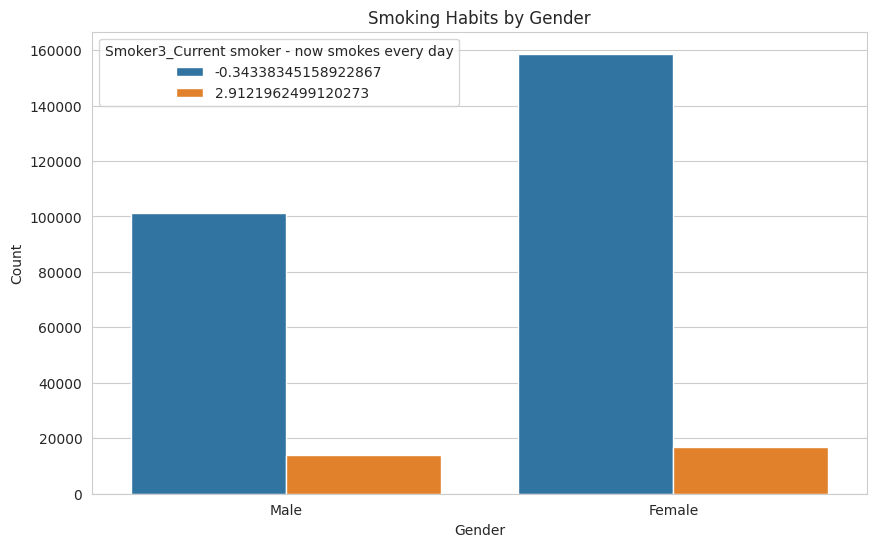

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize smoking habits by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex_Female', hue='Smoker3_Current smoker - now smokes every day')
plt.title('Smoking Habits by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# **INSIGHT 3: Analysing Physical Activity Patterns by Age Group.**

**Illustration:**

*   The visualization illustrates how physical activity is distributed
among individuals in different age groups.
*   Each stacked bar shows the total count of individuals in an age group, and the segments within the bar represent the proportion of individuals with different physical activity levels.

**Interpretation:**


*   You can observe the relative distribution of physically active and inactive individuals within each age group.
*   It helps identify age groups where physical activity levels are higher or lower.
*   Stacked bars provide a visual comparison of physical activity patterns across age categories.

This visualization is useful for understanding the relationship between age and physical activity, which can inform targeted health interventions or fitness programs tailored to specific age groups.


**HEALTH INSURANCE COMPANY BENEFITS:**


- **Risk Identification:** Pinpoint age groups at risk due to low physical activity for targeted health assessments.

- **Tailored Wellness:** Customize wellness programs and communication to address specific age-related health concerns.

- **Product Alignment:** Design insurance products aligned with the health needs of distinct age brackets.

- **Incentivize Healthy Behavior:** Offer incentives or discounts for active lifestyles to promote preventive measures.

- **Cost Management:** Anticipate healthcare costs associated with age-related conditions for effective cost management.

<Figure size 1200x800 with 0 Axes>

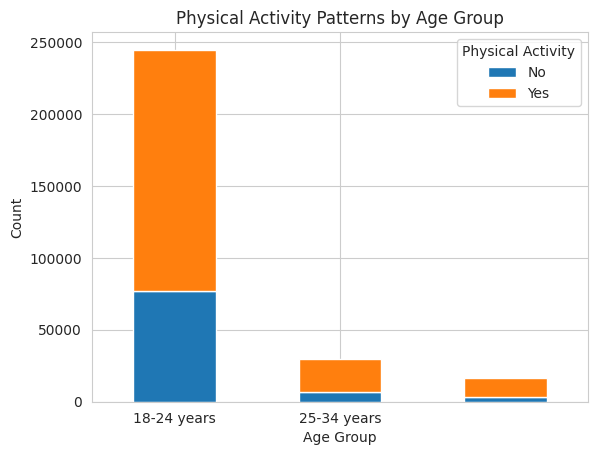

In [94]:
# Assuming you have columns like 'AgeG_Age 18 to 24', 'AgeG_Age 25 to 34', 'ExerAny2_Yes' for physical activity

# Create a stacked bar plot to visualize the distribution of physical activity by age group
age_activity_df = df[['AgeG_Age 18 to 24', 'AgeG_Age 25 to 34', 'ExerAny2_Yes']].dropna()
age_activity_df = age_activity_df.groupby(['AgeG_Age 18 to 24', 'AgeG_Age 25 to 34', 'ExerAny2_Yes']).size().unstack()

plt.figure(figsize=(12, 8))
age_activity_df.plot(kind='bar', stacked=True)
plt.title('Physical Activity Patterns by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks([0, 1], ['18-24 years', '25-34 years'], rotation=0)
plt.legend(title='Physical Activity', loc='upper right', labels=['No', 'Yes'])
plt.show()
